# Suction Anchor Capacity – Jupyter Notebook

### Step 1: Import required libraries

We begin by importing the essential modules:

- `numpy`: used for numerical operations and managing arrays of data (e.g., coordinates, forces).
- `Anchor` from `anchor_map`: the main class that encapsulates the suction anchor's capacity methods - soil properties, anchor geometry and extreme loads.
- `loadPointProps` from `moorpy.helpers` : material cost dictionary for anchor types
- `plot_suction` from `famodel.anchors.anchors_famodel_map.capacity_plots_map`: a custom plotting utility that visualizes anchor geometry and soil properties.

These imports set up the environment to define, simulate, and visualize the anchor system.

In [52]:
import numpy as np
from anchor_map2 import Anchor
from moorpy.helpers import loadPointProps 
from famodel.anchors.anchors_famodel_map.capacity_plots_map import plot_suction

### Step 2: Define the layered soil profile map
We create a list of CPT locations in the vertices of a 500x500 m square within the Lease Area, each with a set of layered clay soil parameters.

In [ ]:
profile_map = [
    {
        'name': 'CPT_A1',
        'x': 0.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top':  10, 'Su_bot':  25},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top':  25, 'Su_bot':  50},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.5, 'Su_top':  50, 'Su_bot': 100},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.5, 'gamma_bot': 9.5, 'Su_top': 100, 'Su_bot': 100}
        ]
    },
    {
        'name': 'CPT_B1',
        'x': 500.0, 'y': 0.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top':  8.5, 'gamma_bot':  9.0, 'Su_top':  15, 'Su_bot':  30},
            {'top':  4.0, 'bottom':  6.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  30, 'Su_bot':  55},
            {'top':  6.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  55, 'Su_bot': 105},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.0, 'Su_top': 105, 'Su_bot': 105}
        ]
    },
    {
        'name': 'CPT_A2',
        'x': 0.0, 'y': 500.0,
        'layers': [
            {'top':  2.0, 'bottom':  4.0, 'soil_type': 'clay', 'gamma_top': 7.5, 'gamma_bot': 8.0, 'Su_top':  5, 'Su_bot': 20},
            {'top':  4.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top': 8.0, 'gamma_bot': 8.5, 'Su_top': 20, 'Su_bot': 45},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 8.5, 'gamma_bot': 9.0, 'Su_top': 45, 'Su_bot': 95},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 9.0, 'gamma_bot': 9.0, 'Su_top': 95, 'Su_bot': 95}
        ]
    },
    {
        'name': 'CPT_B2',
        'x': 500.0, 'y': 500.0,
        'layers': [
            {'top':  1.0, 'bottom':  2.0, 'soil_type': 'clay', 'gamma_top':  9.0, 'gamma_bot':  9.5, 'Su_top':  20, 'Su_bot':  35},
            {'top':  2.0, 'bottom':  8.0, 'soil_type': 'clay', 'gamma_top':  9.5, 'gamma_bot': 10.0, 'Su_top':  35, 'Su_bot':  60},
            {'top':  8.0, 'bottom': 16.0, 'soil_type': 'clay', 'gamma_top': 10.0, 'gamma_bot': 10.5, 'Su_top':  60, 'Su_bot': 110},
            {'top': 16.0, 'bottom': 25.0, 'soil_type': 'clay', 'gamma_top': 10.5, 'gamma_bot': 10.5, 'Su_top': 110, 'Su_bot': 110}
        ]
    }
]

### Step 3: Initialize the anchor object
We define a suction anchor with its type, initial geometry and anchor location within the defined area.

In [60]:
anchor = Anchor(
    dd = {'type': 'suction', 'design': {'D': 2.5, 'L': 12.0, 'zlug': 8.67}},
    r = [250.0, 250.0, 0.0]
)

### Step 4: Assign soil profile to anchor location
This connects the anchor object to the appropriate CPT soil data based on proximity.

In [61]:
anchor.interpolateSoilProfile(profile_map)

[Anchor] Interpolated soil profile: Interpolated_2D with soil types ['clay']


### Step 5: Plot suction anchor and soil profile
We represent a suction anchor embedded in the soil.

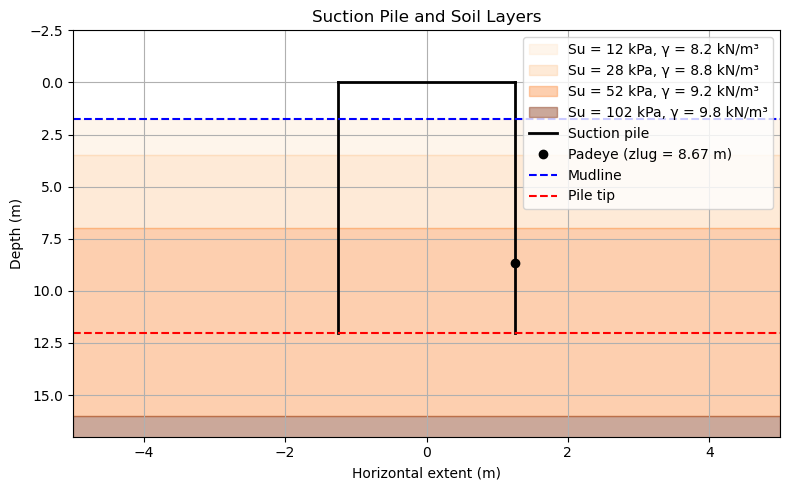

In [62]:
# Access anchor geometrical properties
L = anchor.dd['design']['L']
D = anchor.dd['design']['D']
zlug = anchor.dd['design']['zlug']
# Access matched profile
layers = anchor.soil_profile
z0 = layers[0]['top']  

plot_suction(layers, L=L, D=D, z0=z0, zlug=zlug, title='Suction Pile and Soil Layers')

### Step 6: Assign external loads and line properties
We assign horizontal and vertical loads and specify the mooring line type and its physical properties (nominal diameter and weight (N/m)).

In [63]:
anchor.loads = {
    'Hm': 3e6,
    'Vm': 2e6
}
anchor.line_type = 'chain'
anchor.d = 0.16
anchor.w = 5000.0
print('Initial mass from dd:', anchor.dd['design'].get('mass', 'Not defined'))

Initial mass from dd: Not defined


### Step 7: Compute lug forces
We compute the forces acting at the lug using load, geometry, and soil interaction. 

In [64]:
layers, Ha, Va = anchor.getLugForces(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nLug Forces Computed:')
print(f'Ha = {Ha:.2f} N')
print(f'Va = {Va:.2f} N')

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 8.67
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3375980.0732258284, thetaa = 55.648978744279006
Output Ha = 1904935.434154513, Va = 2787196.1621888806

Lug Forces Computed:
Ha = 1904935.43 N
Va = 2787196.16 N


### Step 8: Compute the anchor capacity
This checks whether the current anchor design meets load requirements. Results and plots are printed for reference.

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 8.67
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3375980.0732258284, thetaa = 55.648978744279006
Output Ha = 1904935.434154513, Va = 2787196.1621888806
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 8.67
Output Ha = 1904935.4341545128, Va = 2787196.162188881, zlug = 8.67
Output Ta = 3375980.073225829, thetaa = 55.648978744279006
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.382
Vmax_layer    = 280523.02 N
Vmax1   = not applicable
Vmax2   = 280523.02 N
Vmax3   = 241917.02 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.388
Vmax_layer    = 977721.41 N
Vmax1   = not applicable
Vmax2   = 977721.41 N
Vmax3   = 697709.86 N
dz_clip  = 5.00 m
ez_layer = 9.68 m
Su_av_z (at ez_layer) = 67381.35 Pa
alphastar   = 0.381
Vmax_layer    = 4714446.61 N
Vmax1   = 4714446.61 N
Vmax2   = 2131059.03 N
Vmax3   = 1378013.04 N
dz_clip  = -

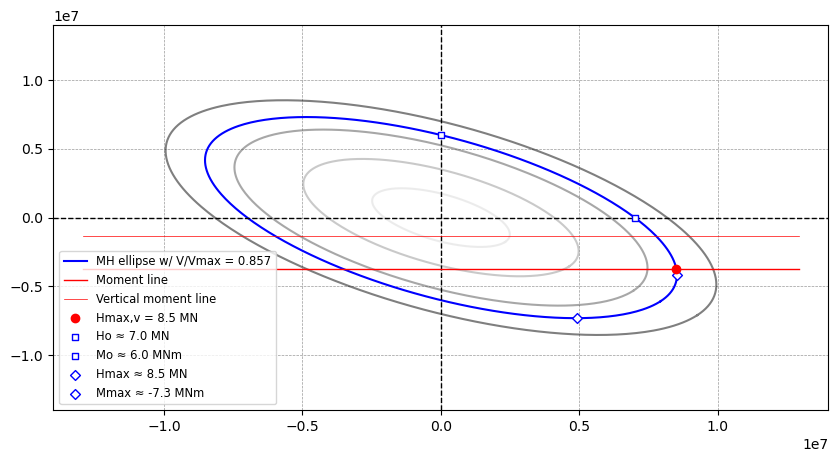

<Figure size 600x500 with 0 Axes>

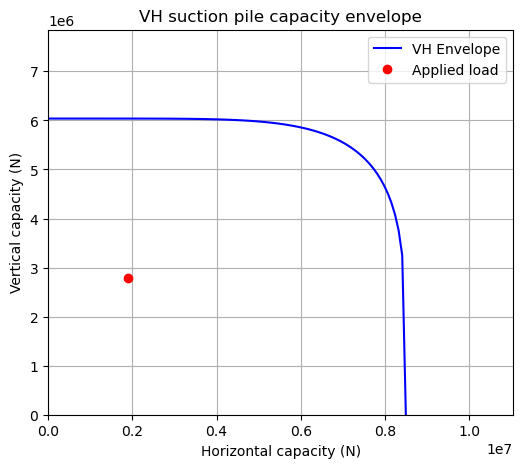


Capacity Results:
Hmax: 8496895.31
Vmax: 6037871.08
Ha: 1904935.43
Va: 2787196.16
zlug: 8.67
z0: 1.75
UC: 0.01
Weight pile: 457496.77
Initial mass from dd: Not defined


In [65]:
anchor.getCapacityAnchor(
    Hm = anchor.loads['Hm'],
    Vm = anchor.loads['Vm'],
    zlug = anchor.dd['design']['zlug'],
    line_type = anchor.line_type,
    d = anchor.d,
    w = anchor.w,
    plot = True
)

print('\nCapacity Results:')
for key, value in anchor.anchorCapacity.items():
    print(f'{key}: {value:.2f}')
print('Initial mass from dd:', anchor.dd['design'].get('mass', 'Not defined'))

### Step 9: Anchor material costs
We assess the cost of the suction pile defined by the manufacturing cost (USD/kg)

In [68]:
anchor.getCostAnchor()
print(f'Mass: {anchor.mass:.2f} kg')
mat_cost = anchor.cost['Material Cost']
print(f'Material unit cost: {mat_cost/anchor.mass:.2f} USD/kg')
cost = anchor.cost['Material Cost']
print(f'Material unit cost: {cost:.2f} USD [2024]')


Mass: 46635.76 kg
Material unit cost: 10.25 USD/kg
Material unit cost: 478016.50 USD [2024]


### Step 10: Optimize anchor geometry
We optimize anchor length and diameter to ensure capacity requirements are met efficiently within given bounds. Note that a safety factor (SF_combined) = 2 is used in this optimization process. This means that the unity check (UC = 1/SF) equals 0.5. This way the design can accept some extra capacity based on input preference.

Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 7.3994720299213235
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3424786.566951552, thetaa = 50.31448431163705
Output Ha = 2186977.238360048, Va = 2635582.2104549985
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 7.3994720299213235
Output Ha = 2186977.238360048, Va = 2635582.2104549985, zlug = 7.3994720299213235
Output Ta = 3424786.566951552, thetaa = 50.314484311637045
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.385
Vmax_layer    = 200260.26 N
Vmax1   = not applicable
Vmax2   = 200260.26 N
Vmax3   = 158332.30 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.390
Vmax_layer    = 721849.55 N
Vmax1   = not applicable
Vmax2   = 721849.55 N
Vmax3   = 482456.87 N
dz_clip  = 4.10 m
ez_layer = 9.17 m
Su_av_z (at ez_layer) = 64579.89 Pa
alphastar   = 0.367
Vmax_layer    = 2557658.86 N
Vmax1   = 2557658.86 N
Vmax2   = 1204929.

c:\code\famodel\famodel\anchors\anchors_famodel_map\capacity_suction_map.py:348: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


Input Tm = 3605551.2754639895, thetam = 33.690067525979785, zlug = 7.399663030117857
Output Hm = 3000000.0000000005, Vm = 1999999.9999999998
Output Ta = 3424786.566951552, thetaa = 50.31448431163705
Output Ha = 2186977.238360048, Va = 2635582.2104549985
Input Hm = 3000000.0, Vm = 2000000.0, zlug = 7.399663030117857
Output Ha = 2186977.238360048, Va = 2635582.2104549985, zlug = 7.399663030117857
Output Ta = 3424786.566951552, thetaa = 50.314484311637045
dz_clip  = 1.75 m
ez_layer = 2.74 m
Su_av_z (at ez_layer) = 20960.65 Pa
alphastar   = 0.385
Vmax_layer    = 200452.11 N
Vmax1   = not applicable
Vmax2   = 200452.11 N
Vmax3   = 158521.95 N
dz_clip  = 3.50 m
ez_layer = 5.44 m
Su_av_z (at ez_layer) = 41334.23 Pa
alphastar   = 0.390
Vmax_layer    = 722481.16 N
Vmax1   = not applicable
Vmax2   = 722481.16 N
Vmax3   = 482962.54 N
dz_clip  = 4.10 m
ez_layer = 9.17 m
Su_av_z (at ez_layer) = 64580.77 Pa
alphastar   = 0.367
Vmax_layer    = 2561440.74 N
Vmax1   = 2561440.74 N
Vmax2   = 1206079.54 

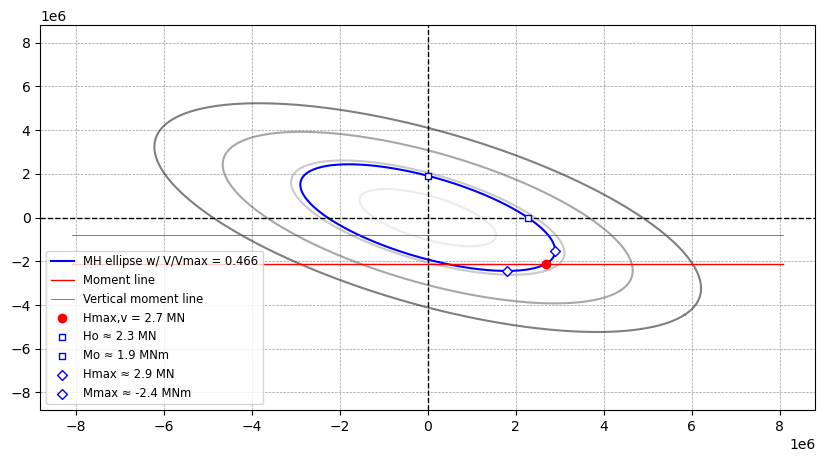

<Figure size 600x500 with 0 Axes>

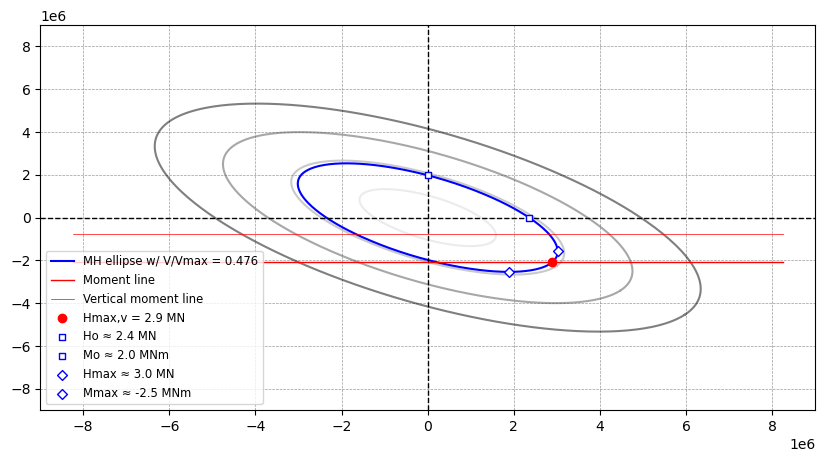

<Figure size 600x500 with 0 Axes>

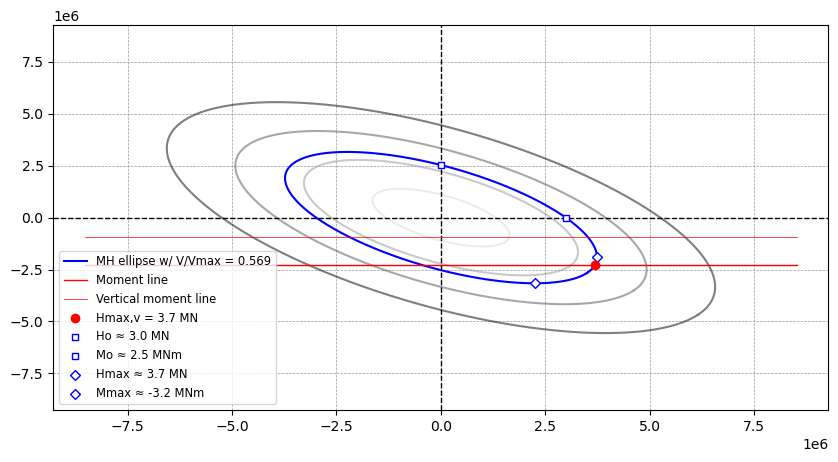

<Figure size 600x500 with 0 Axes>

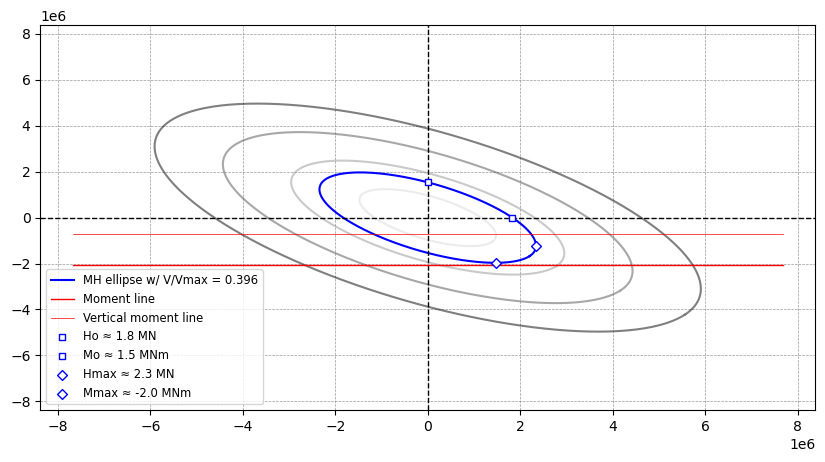

<Figure size 600x500 with 0 Axes>

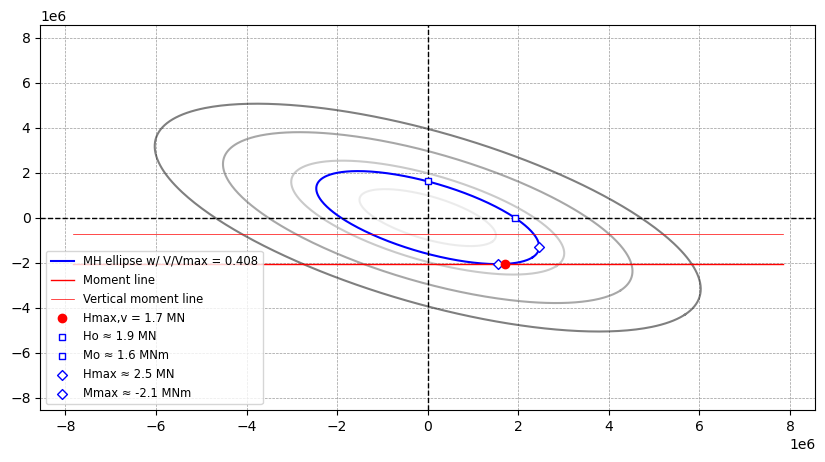

<Figure size 600x500 with 0 Axes>

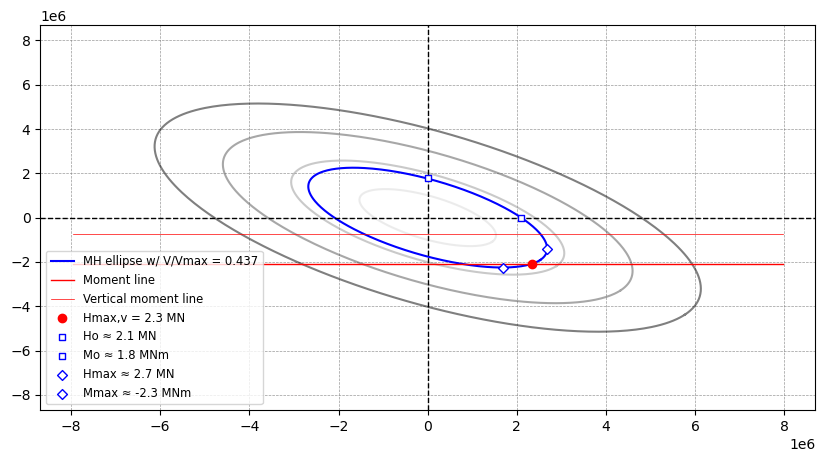

<Figure size 600x500 with 0 Axes>

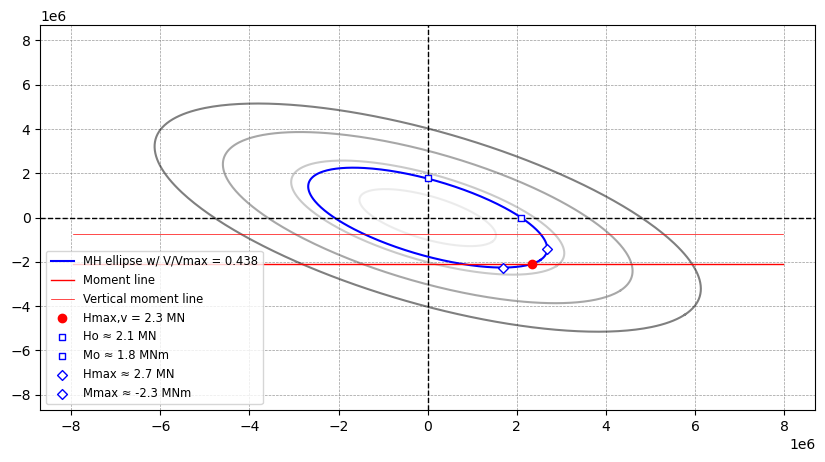

<Figure size 600x500 with 0 Axes>

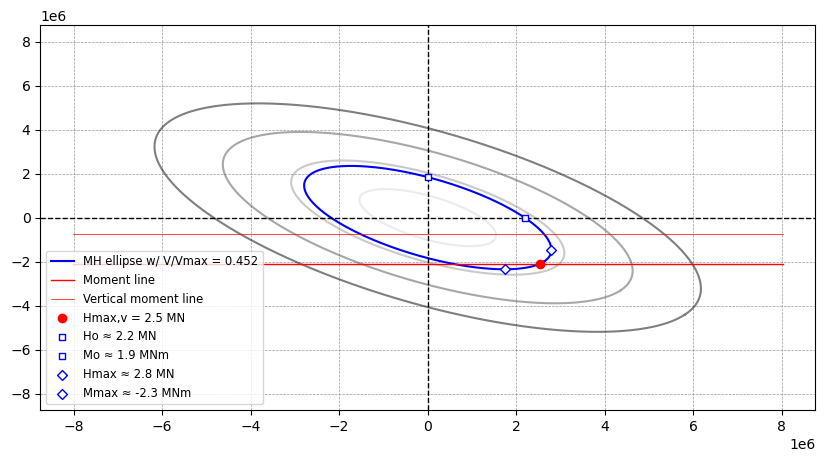

<Figure size 600x500 with 0 Axes>

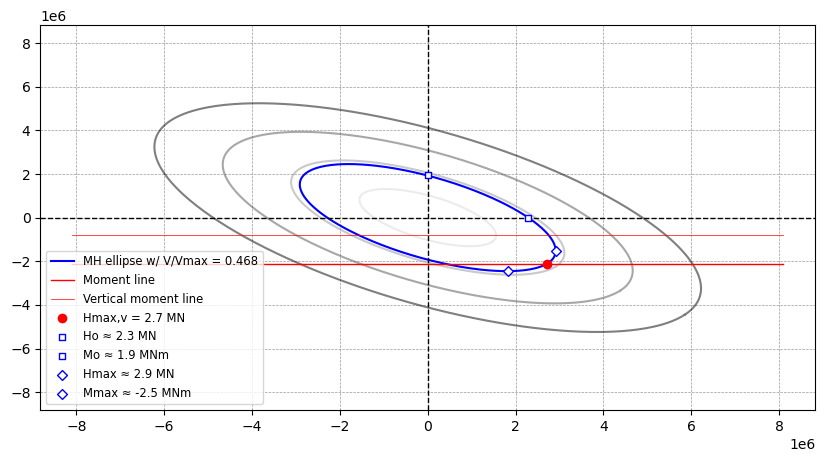

<Figure size 600x500 with 0 Axes>

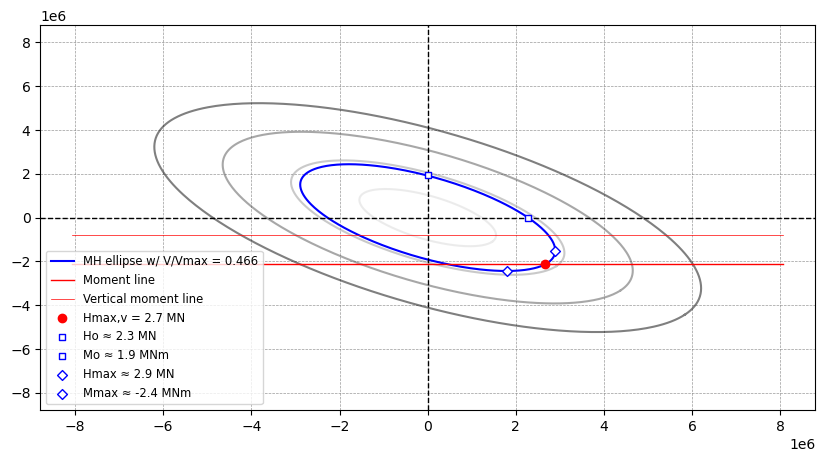

<Figure size 600x500 with 0 Axes>

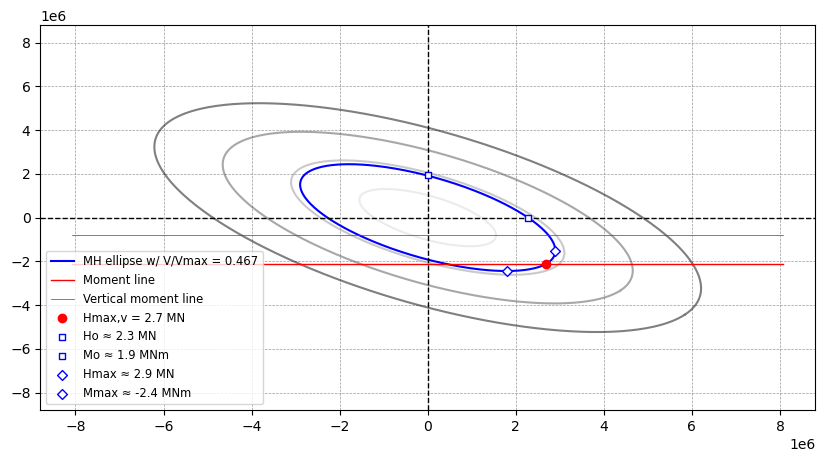

<Figure size 600x500 with 0 Axes>

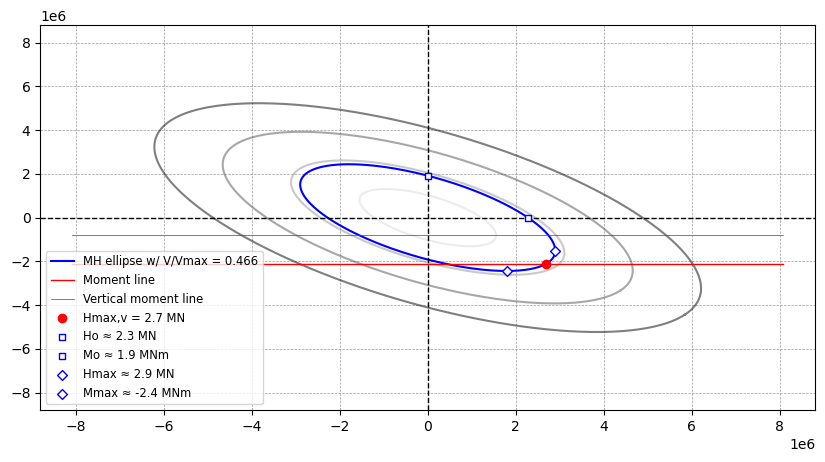

<Figure size 600x500 with 0 Axes>

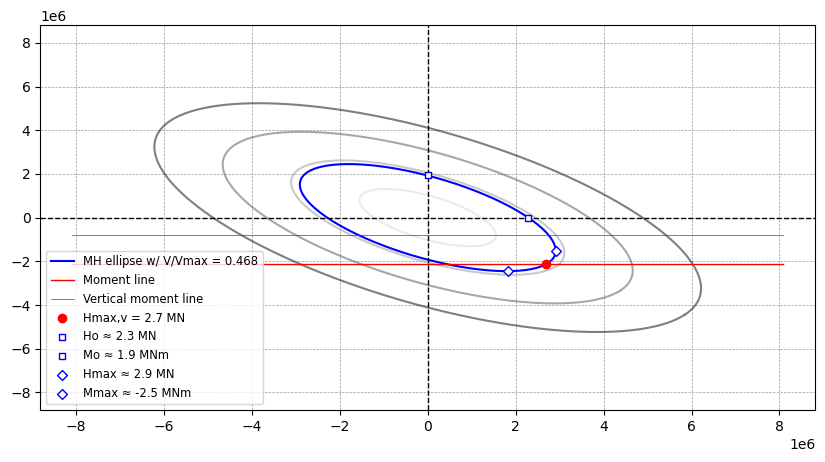

<Figure size 600x500 with 0 Axes>

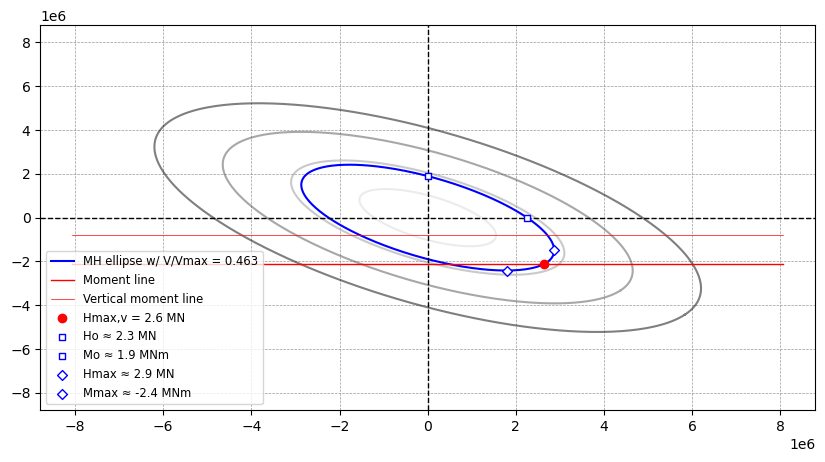

<Figure size 600x500 with 0 Axes>

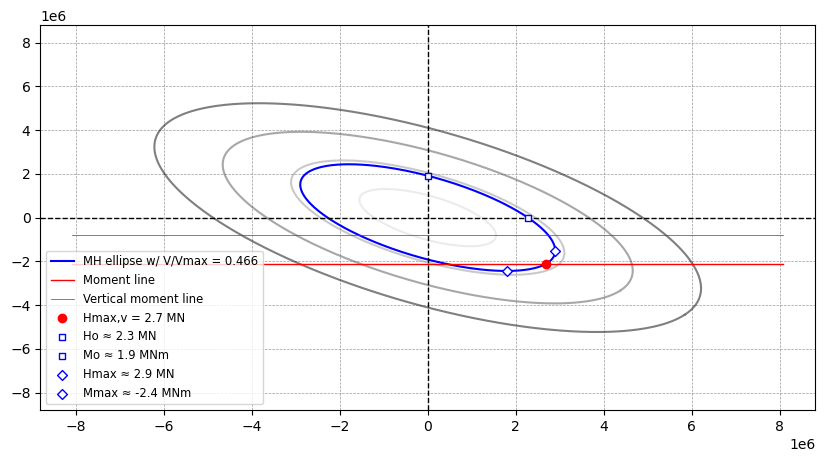

<Figure size 600x500 with 0 Axes>

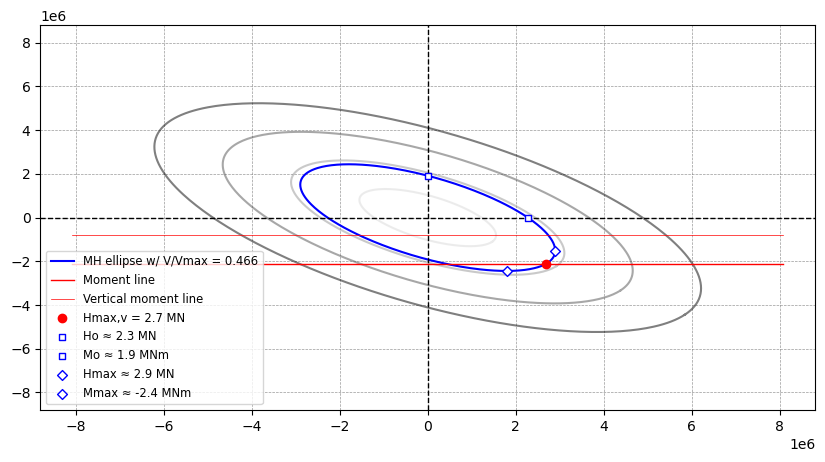

<Figure size 600x500 with 0 Axes>

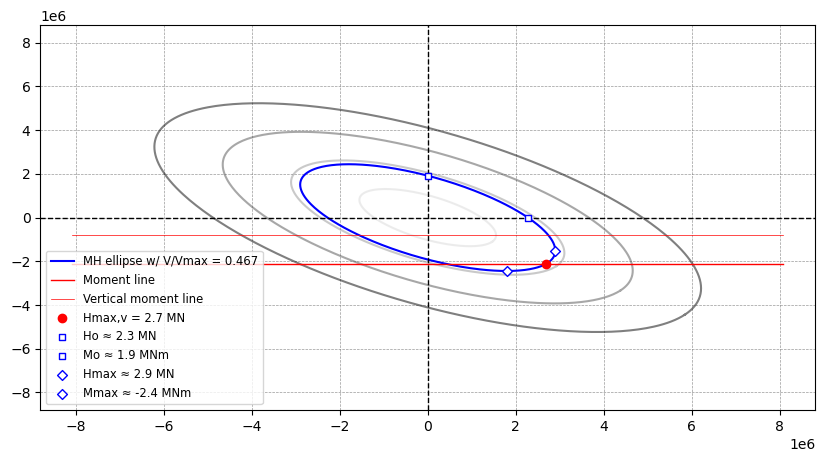

<Figure size 600x500 with 0 Axes>

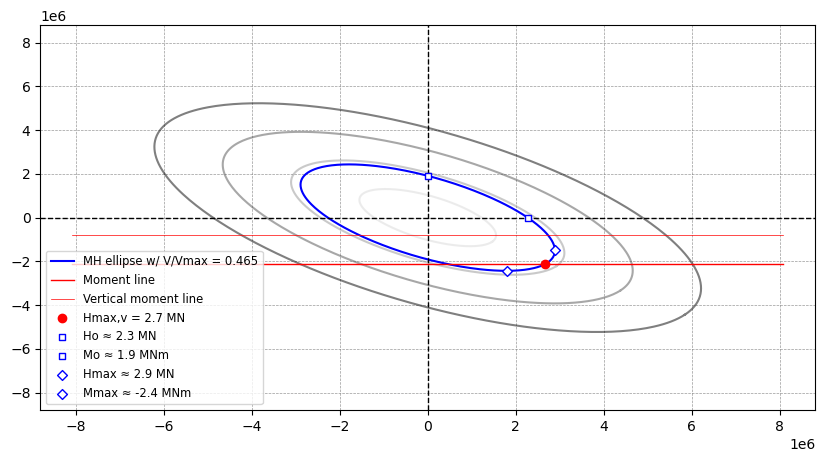

<Figure size 600x500 with 0 Axes>

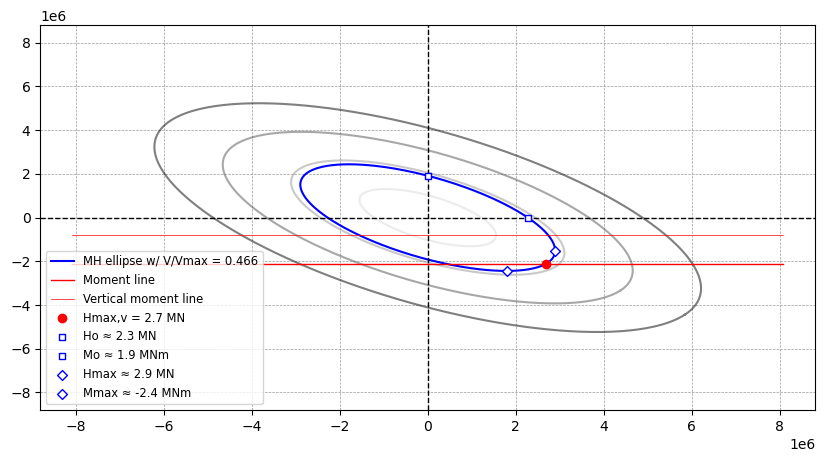

<Figure size 600x500 with 0 Axes>

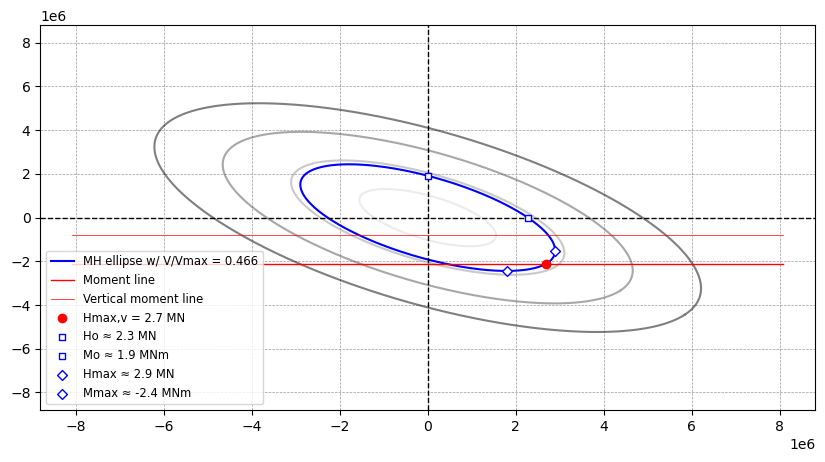

<Figure size 600x500 with 0 Axes>

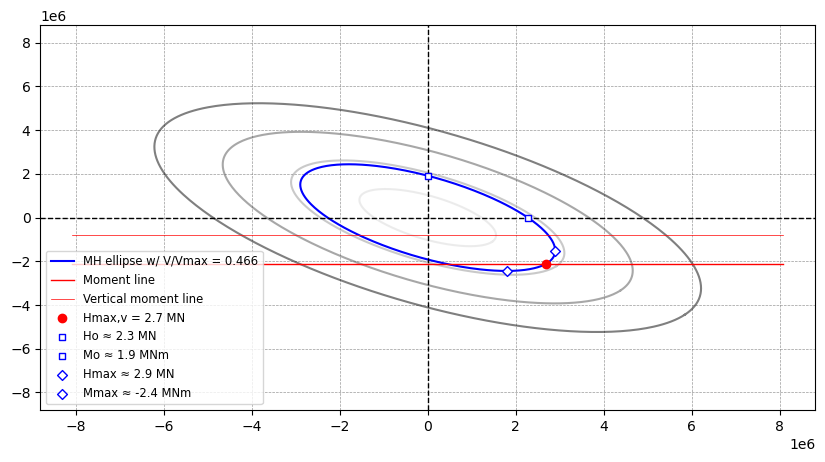

<Figure size 600x500 with 0 Axes>

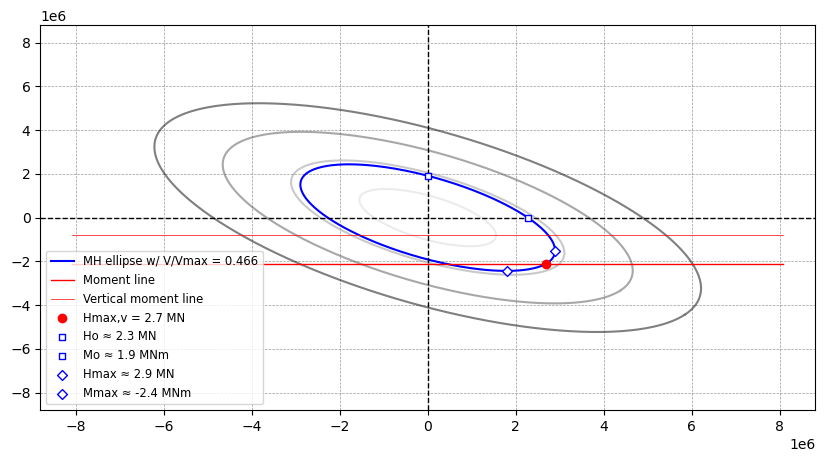

<Figure size 600x500 with 0 Axes>

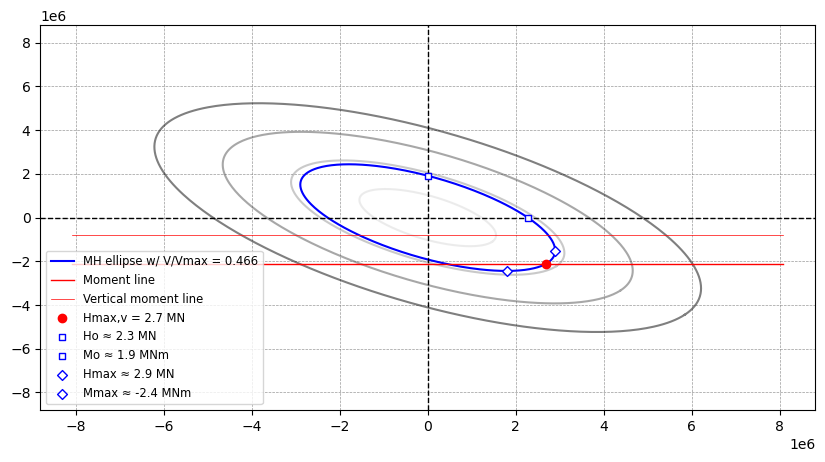

<Figure size 600x500 with 0 Axes>

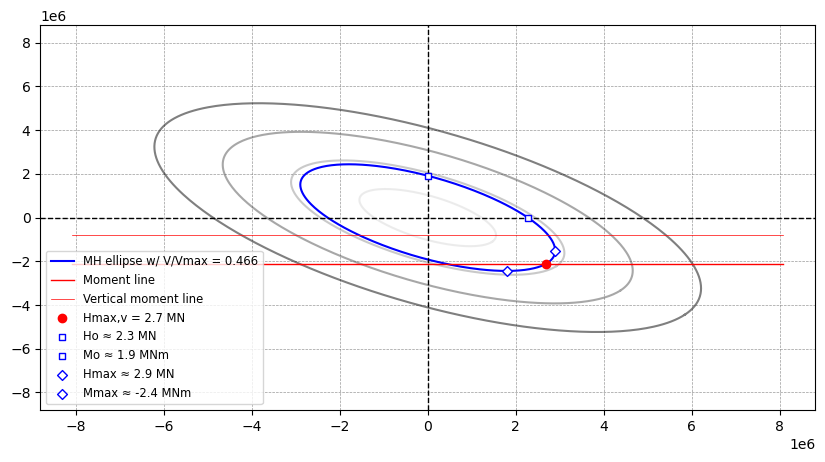

<Figure size 600x500 with 0 Axes>

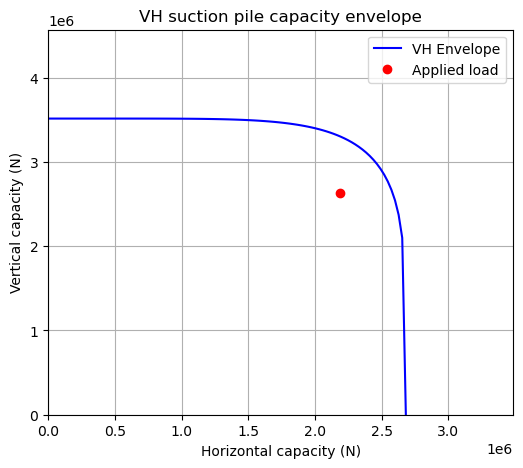


Final Optimized Anchor (UC-based):
Design: {'D': 1.8913423714362043, 'L': 11.099109792742743, 'zlug': 7.399406528495161}
Capacity Results: {'Hmax': 2680906.8193874736, 'Vmax': 3516323.1295673824, 'Ha': 2186977.238360048, 'Va': 2635582.2104549985, 'zlug': 7.399406528495161, 'z0': 1.75, 'UC': 0.5000000059450904, 'Weight pile': 248935.56028983108}

Final Optimized Anchor:
Design: {'D': 1.8913423714362043, 'L': 11.099109792742743, 'zlug': 7.399406528495161}
Capacity Results: {'Hmax': 2680906.8193874736, 'Vmax': 3516323.1295673824, 'Ha': 2186977.238360048, 'Va': 2635582.2104549985, 'zlug': 7.399406528495161, 'z0': 1.75, 'UC': 0.5000000059450904, 'Weight pile': 248935.56028983108}


In [71]:
anchor.getSizeAnchor(
    geom = [anchor.dd['design']['L'], anchor.dd['design']['D']],
    geomKeys = ['L', 'D'],
    geomBounds = [(5.0, 15.0), (1.0, 4.0)],
    loads = None,
    lambdap_con = [3, 6],
    zlug_fix = False,
    safety_factor = {'SF_combined': 2},
    plot = True
)

print('\nFinal Optimized Anchor:')
print('Design:', anchor.dd['design'])
print('Capacity Results:', anchor.anchorCapacity)

### Step 11: Optimized anchor material costs
We assess the cost of the optimized suction pile defined by the manufacturing cost (USD/kg)

In [70]:
anchor.getCostAnchor()
print(f'Mass: {anchor.mass:.2f} kg')
mat_cost = anchor.cost['Material Cost']
print(f'Material unit cost: {mat_cost/anchor.mass:.2f} USD/kg')
cost = anchor.cost['Material Cost']
print(f'Material unit cost: {cost:.2f} USD [2024]')

Mass: 25375.44 kg
Material unit cost: 10.25 USD/kg
Material unit cost: 260098.25 USD [2024]
